## Analyze A/B Test Results

 
## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

<UL>
    <LI>A/B tests , understand the results of an A/B test run by an e-commerce website.  
    <LI> goal is to   through  help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.
        <LI>  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
#from google.colab import files
#uploaded = files.upload()

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [5]:
df = pd.read_csv('./ab_data.csv')
#countries = pd.read_excel ('countries.csv')  df = pd.read_csv('ab_data.csv')
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
 df.shape[0]

294478

c. The number of unique users in the dataset.

print(df.shape)
df['user_id'].nunique()
print("number of duplicated users")
print(df.shape[0] - df['user_id'].nunique())
print("number of users enterd the same  webisite evaluation is ")
print( df.duplicated().sum() )

d. The proportion of users converted.

In [5]:
(df['user_id'].nunique() / df.shape[0] )  *100

98.67766013080774

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'old_page'))].shape[0]

3893

In [7]:
df[((df['group'] == 'control') == (df['landing_page'] == 'new_page'))].shape[0]

3893

f. Do any of the rows have missing values?

In [16]:
df.loc[:, :].isnull().sum()
print( df.isna().sum() )
print(df.isin([np.nan]).sum() )

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

<font color = 'darkblue'> <B> Non of the rows or coulmnus has an empty value </B> </font>

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [18]:
indexes=np.where( df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False] )[0]
indexes 

array([   0,    0,    0, ..., 3892, 3892, 3892])

In [19]:
df2=pd.DataFrame()


In [20]:
df2=df2.append(df [(df.group == 'control') & (df.landing_page == 'old_page')] )

In [21]:
df2=df2.append(df[(df.group == 'treatment') & (df.landing_page == 'new_page')] )

In [22]:
df2.tail()

,user_id,timestamp,group,landing_page,converted
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [23]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [26]:
print(np.count_nonzero( df2['user_id']  )) 
df2['user_id'].nunique() 

290585


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [42]:
uid =df2[df2['user_id'].duplicated()].user_id 

2893    773192
Name: user_id, dtype: int64

In [47]:
uid.values
 

array([773192])

c. What is the row information for the repeat **user_id**? 

In [51]:
print( df2[ df2['user_id'].isin (uid.values )] )
df2[df2['user_id'].duplicated()].index

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


Int64Index([2893], dtype='int64')

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [52]:
df['user_id'].drop_duplicates(inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [53]:
print(df.head())
print('P(converted)=')
df2.converted.sum() / df2.shape[0]

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1
P(converted)=


0.11959667567149027

<p style="color:red">  0.12

b. Given that an individual was in the `control` group, what is the probability they converted?

In [88]:
#control_conv_group = df2[(df2['group'] =='control' ) &  df2['converted'] ==1 ].shape[0]
#print('P(converted from control group,)=')

#control_conv_group / df2.converted.sum() 

np.mean( df2[ df2['landing_page'] == 'new_page' ].converted   )
#np.mean(df2[(df2['landing_page'] =='new_page' ) &  df2['converted']  ] )

0.11880724790277405

<font color= 'red ' > 0.12, do not get it why it differ from <BR>
    <h2> #np.mean(df2[(df2['landing_page'] =='new_page' ) &  df2['converted']  ] )  

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [89]:
#control_conv_group = df2[(df2['group'] =='treatment' ) &  df2['converted'] ==1 ].shape[0]
#print('P(converted from treatment group,)=')

#control_conv_group / df2.converted.sum() 
np.mean( df2[ df2['landing_page'] == 'old_page' ].converted)

0.1203863045004612

<p style="color:red">  0.12

d. What is the probability that an individual received the new page?

In [70]:
#df2[(df2['landing_page'] =='old_page' )  ].shape[0] / df2.shape[0]
df2["converted"].sum() / len(df2) * 100

11.959667567149026

<p style="color:red">  0.12

<h1> <p style="color:darkred"> this is reviewer comment and probability shouldnt be more than one  ? cant get this!
    

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<p style="color:red"> <B> conversion properability from treatment and control gruoup seems to be the same, The company shouldnt take a decsion based on this data and might gather more data or simply sumulate it then take decision .

<p style="color:red"> <B>  moving to the new website has no differ from holding the old one

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  <p style="color:red">  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<p style="color:green"> <B> 
**Put your answer here.**<BR>
H<sub>0</sub> : P<sub>new</sub> <= P<sub>old</sub>  <br>
H<sub>1</sub> : P<sub>new</sub> >   P<sub>old</sub> <br>
alpha=5% <br>
beta = 95%  <br>
type 1 error the new page is better and the user thinks the old is the one and do not convert <BR>  </P>
    
<font color = "red"> Reviewer comment was the hypotheis must be changed into:
    
<br> H0 : Pnew - Pold <= 0
H1: Pnew - Pold > 0 <BR>
     done

<p style="color:green"> <B> the Q: is, is the new page really better than the old one
Hw do we know that: the average converted number, is there a differ in converted mean? how much is it significant?

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

we just need to focus on the folloing coulumns

In [90]:
df2.head()
df3= pd.DataFrame(df2['landing_page'],df2['converted'] )
df3.head()

,landing_page
converted,
0,old_page
0,old_page
1,old_page
0,old_page
0,old_page


(array([127785.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17489.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

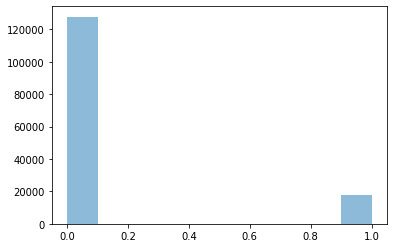

In [91]:
plt.hist(df2[df2['landing_page']=='old_page'].converted  , alpha=0.5,  label='old_page')


(array([128047.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17264.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

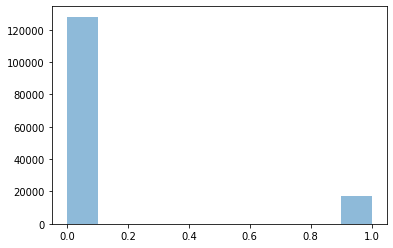

In [92]:
plt.hist(df2[df2['landing_page']=='new_page'].converted, alpha=0.5, label='new_page')


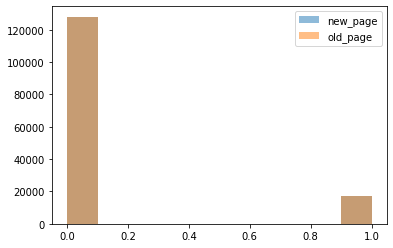

In [93]:
plt.hist(df2[df2['landing_page']=='new_page'].converted, alpha=0.5, label='new_page')
plt.hist(df2[df2['landing_page']=='old_page'].converted  , alpha=0.5,  label='old_page')
plt.legend(loc='upper right')
plt.show() 

seems similer and no differ in the reak data.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [94]:
convert_rate_new= df[ (df['converted'] ==1 ) &  df['landing_page'] == 'new_page' ].user_id.nunique() / df[df['converted'] ==1 ].user_id.nunique()  
convert_rate_new

/home/ragia/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0.0

In [119]:
np.mean( df2[ df2['landing_page'] == 'new_page' ].converted)

0.8811927520972259

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [120]:
convert_rate_old= df[ (df['converted'] ==1 ) &  df['landing_page'] == 'old_page' ].user_id.nunique() / df[df['converted'] ==1 ].user_id.nunique()  
convert_rate_old

0.0

In [121]:
np.mean( df2[ df2['landing_page'] == 'old_page' ].converted)

0.8796136954995388

c. What is $n_{new}$?

In [122]:
df.query('landing_page == "new_page"').shape[0]

147239

d. What is $n_{old}$?

In [123]:
df.query('landing_page == "old_page"').shape[0]

147239

The observed difference between the two groups

In [131]:
observed_difference =np.mean( df2[ df2['landing_page'] == 'new_page' ].converted) - np.mean( df2[ df2['landing_page'] == 'old_page' ].converted)  
observed_difference

0.0015790565976870896

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [132]:
size = df2.shape[0]
sample=df2.sample(size, replace = True)
new_mean =  sample.query('landing_page == "new_page"').converted.mean()
new_mean

0.8807717915805803

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [133]:
old_mean =sample.query('landing_page == "old_page"').converted.mean()
old_mean

0.8803710196137973

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [134]:
new_mean-old_mean

0.00040077196678300897

<p style="color:green"> <B>  can't take decision depending on one sample we should simulate

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [135]:
diffs = []
size = df2.shape[0]
for _ in range(2500):
    sample=df2.sample(size, replace = True)
    old_mean =sample.query('landing_page == "old_page"').converted.mean()
    new_mean =  sample.query('landing_page == "new_page"').converted.mean()
    diffs.append(new_mean- old_mean)

In [136]:
diffs 

[0.0022352939995311516,
 0.0005906174211106618,
 0.002850556333002574,
 0.0004026530766000347,
 0.0011144546214628681,
 0.0030265787491772222,
 -0.000494483213089203,
 0.000764776392893185,
 0.0030064193135619366,
 0.0021386737814359513,
 0.001483909135442718,
 0.002584807310103465,
 0.0016155621089160022,
 0.002340568898122619,
 0.0021640324991797355,
 0.0007727006391925473,
 0.0014726448352152532,
 0.00279713104271051,
 0.0009498568244140637,
 0.002971352547998296,
 0.0018409493103762609,
 0.002059754417091164,
 0.0006747098107896532,
 0.0026065572724444097,
 0.0008165105726030131,
 0.0026378158176829647,
 0.0008248915305458793,
 0.0013106514798831848,
 0.0029255550420258514,
 0.00010935499063136067,
 0.0019645102134057124,
 0.0013200423655125304,
 0.0008366559516664873,
 0.002436036651087048,
 0.0013044052720831978,
 0.0010130836141215571,
 0.0033993276374620907,
 0.001248436709476164,
 -0.0012699828920972323,
 0.0013091400385423224,
 -0.00032447224146503473,
 0.0023982227058118033,

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  5.,  36., 139., 417., 690., 651., 401., 125.,  31.,   5.]),
 array([-0.00277717, -0.00189792, -0.00101868, -0.00013943,  0.00073982,
         0.00161906,  0.00249831,  0.00337755,  0.0042568 ,  0.00513604,
         0.00601529]),
 <a list of 10 Patch objects>)

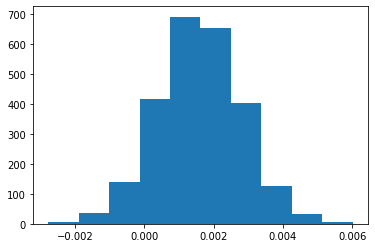

In [137]:
diffs = np.asarray( diffs  )
plt.hist(diffs)

<p style="color:green"> <B> the real difference mean is -0.0015 it seems very far a way on the left  tail from what we saw here but we should see its significant for that we will have a look on null distrubtuin an p value

In [138]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal( 0, diffs.std(),diffs.size)

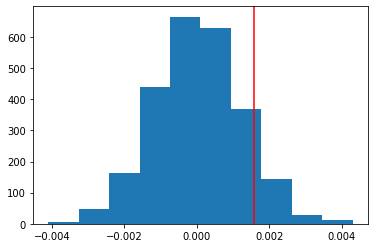

In [139]:
# plot null distribution
plt.hist(null_vals  )
# plot line for observed statistic
plt.axvline( x=observed_difference,color='r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [140]:
# compute p value
(null_vals>observed_difference).mean()

0.0996

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<p style="color:green"> <B> **Put your answer here.**<Br>
   p value is not statistically significant since its higher than .05. , evidence for the null hypothesis wish was the old page is better thatn the new one and its affected converted. 
    I guess this is the power of simulation to see how the data talks and matches, looking at the data would drag us to wrong descion. for that we accept the null hypotheisi and regect the alternate so the new page will do better job and we recommend moving to the new website.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [141]:
df2.describe()

,user_id,converted,not_converted
count,290585.000000,290585.000000,290585.000000
mean,788004.825246,0.880403,0.119597
std,91224.582639,0.324490,0.324490
min,630000.000000,0.000000,0.000000
25%,709035.000000,1.000000,0.000000
50%,787995.000000,1.000000,0.000000
75%,866956.000000,1.000000,0.000000
max,945999.000000,1.000000,1.000000


In [142]:
df2[['converted','not_converted']]=pd.get_dummies(df['converted'])

In [143]:
df2.head()

,user_id,timestamp,group,landing_page,converted,not_converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,1,0


In [144]:
convert_oldtable = df2[(df2['group'] =='control' ) &  df2['converted'] ==1 ]
convert_oldtable.shape[0] 


127785

In [145]:
convert_newtable = df2[(df2['group'] =='treatment' ) &  df2['converted'] ==1 ]
convert_newtable.shape  

(128047, 6)

In [146]:
controlgroup = df2[(df2['group'] =='control' )]
controlgroup.shape

(145274, 6)

In [147]:
treatmetngroup= df2[(df2['group'] =='treatment' )]
treatmetngroup.shape

(145311, 6)

In [148]:
import statsmodels.api as sm

convert_old = convert_oldtable.shape[0] 
convert_new = convert_newtable.shape[0]
n_old = convert_old- controlgroup.shape[0]
n_new = convert_new - treatmetngroup.shape[0]
abs(n_old) , abs(n_new)

(17489, 17264)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [149]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3116350128538101, 0.9051783432470659)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
p value is very large so no stistical sifnifcant thus we favour the null hypothesis in favour of the alternate

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

logesitic , since its betweeen two values 0 and 1

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [154]:
import statsmodels.api as sm

In [155]:
df2['intersept']=1


In [156]:
df2.head()

,user_id,timestamp,group,landing_page,converted,not_converted,intersept
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,0,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,1,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,1,0,1


In [158]:
df2[[ 'control','treatment']]=pd.get_dummies(df['landing_page'])
 

In [162]:
df2.tail() 

,user_id,timestamp,group,landing_page,converted,not_converted,intersept,treatment,control,ab_page
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,1,0,1,0,1,1
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,1,0,1,0,1,1
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,1,0,1,0,1,1
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,1,0,1,0,1,1
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,1,0,1,0,1,1


In [163]:
df2['ab_page']=df2['control']

In [165]:
df2.head()

,user_id,timestamp,group,landing_page,converted,not_converted,intersept,treatment,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0,1,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,0,1,1,1,0,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,1,0,1,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,1,0,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [167]:
log_modl = sm.Logit(df2['converted'], df2[['intersept', 'ab_page']])
results  =  log_modl.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.112141
         Iterations 6


/home/ragia/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ragia/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ragia/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: inf       
Dependent Variable: converted        AIC:              65177.0747
Date:               2020-09-30 09:20 BIC:              65198.2341
No. Observations:   290585           Log-Likelihood:   -32587.   
Df Model:           1                LL-Null:          0.0000    
Df Residuals:       290583           LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025  0.975]
------------------------------------------------------------------
intersept      1.9888    0.0081  246.6690  0.0000   1.9730  2.0046
ab_page        0.0150    0.0114    1.3116  0.1897  -0.0074  0.0374
=================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

<p style="color:green"> $R^2$ is inf  that means  the model is not good representaion for this case, and difucult to calc r squared ? !
on the other hand P_value is less than .05, wish mean that the old page is better than the new one in conversion rate

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<p style="color:green">0.1897 <br>
null new page better or equal, alternative not better than the old  <br>
    in part 2 er dod not use the same features to make the model, the dummy variabels used only here regardeless other coulumns.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

 <p style="color:green"> 
    user age <br>
 time used the page <br>
 user original country or culture maybe background too <br>
 all these could influence the user to convert or not, and should be added to the model, things that shouldnt be added might be number of user kids or his salary...but if the website is selling products for kids or other stuff that might  be included too since its will influence how stuff appear on the page and make the user buy or just leave it.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [168]:
countries_df = pd.read_csv('./countries.csv')

In [176]:
print ( countries_df ['country'].value_counts())

countries_df.head()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [177]:
df2.shape

(290585, 10)

In [178]:
countries_df['user_id'].isin( df2['user_id']).value_counts()

True    290584
Name: user_id, dtype: int64

one of the users is not exist in the merge process.

In [179]:
result = pd.merge(df2, countries_df[['user_id', 'country']],on='user_id', how='left')
result.shape

(290585, 11)

In [180]:
result.head()

,user_id,timestamp,group,landing_page,converted,not_converted,intersept,treatment,control,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0,1,1,0,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0,1,1,0,0,US
2,864975,2017-01-21 01:52:26.210827,control,old_page,0,1,1,1,0,0,US
3,936923,2017-01-10 15:20:49.083499,control,old_page,1,0,1,1,0,0,US
4,719014,2017-01-17 01:48:29.539573,control,old_page,1,0,1,1,0,0,US


In [556]:
####  df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

<p style="color:red">  NO need for this complex code

In [182]:
df_new=pd.DataFrame()
df_new=result
df_new.shape

(290585, 11)

In [183]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,not_converted,intersept,treatment,control,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0,1,1,0,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0,1,1,0,0,US
2,864975,2017-01-21 01:52:26.210827,control,old_page,0,1,1,1,0,0,US
3,936923,2017-01-10 15:20:49.083499,control,old_page,1,0,1,1,0,0,US
4,719014,2017-01-17 01:48:29.539573,control,old_page,1,0,1,1,0,0,US


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
### Create the necessary dummy variables

In [184]:
countries_df.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [186]:
df_new[[ 'UK','US','CA']] = pd.get_dummies(df_new['country'])

In [187]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,not_converted,intersept,treatment,control,ab_page,country,UK,US,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0,1,1,0,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0,1,1,0,0,US,0,0,1
2,864975,2017-01-21 01:52:26.210827,control,old_page,0,1,1,1,0,0,US,0,0,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,1,0,1,1,0,0,US,0,0,1
4,719014,2017-01-17 01:48:29.539573,control,old_page,1,0,1,1,0,0,US,0,0,1


<font color ='darkblue'> <h2>creating higher order term representing th interaction between the country and the pages as  suggested

In [188]:
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']

In [189]:
df_new.head(2)

,user_id,timestamp,group,landing_page,converted,not_converted,intersept,treatment,control,ab_page,country,UK,US,CA,US_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0,1,1,0,0,US,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0,1,1,0,0,US,0,0,1,0


In [190]:
### Fit Your Linear Model And Obtain the Results
#df_new['intersept']=1
log_modl = sm.Logit(df_new['converted'], df_new[['intersept', 'ab_page', 'CA','US','US_ab_page']])
results  =  log_modl.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.112140
         Iterations 6


/home/ragia/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ragia/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ragia/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: inf       
Dependent Variable: converted        AIC:              65182.4925
Date:               2020-09-30 09:55 BIC:              65235.3907
No. Observations:   290585           Log-Likelihood:   -32586.   
Df Model:           4                LL-Null:          0.0000    
Df Residuals:       290580           LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
intersept       2.0257    0.0268  75.5179  0.0000   1.9731  2.0783
ab_page         0.0236    0.0132   1.7861  0.0741  -0.0023  0.0495
CA             -0.0407    0.0269  -1.5149  0.1298  -0.0934  0.0120
US             -0.0335    0.0313  -1.0695  0.2848  -0.0948  0.0279
US_ab_page     -0.0344    0.0264  -1.3061  0.1915  -0.0861  0.0172
=================================================================

"""

In [192]:
ab,ca,us,US_ab_page= (1-np.exp(0.0741)), np.exp(0.1298), np.exp(-0.2848),np.exp(-0.0861)

In [193]:
ab,ca,us,US_ab_page

(-0.07691449156098296,
 1.1386006404230062,
 0.7521646722115344,
 0.9175024763848472)

<p style="color:red"> <B>for each one unit increase on ab,ca , us and US_ab_page for each of them the converted 
will mytiplactivly increase by the exponated coef, when other coef are not changed
from this we can see that the country influence is the largest one and it acauses around one 
unit increase if other features not changed


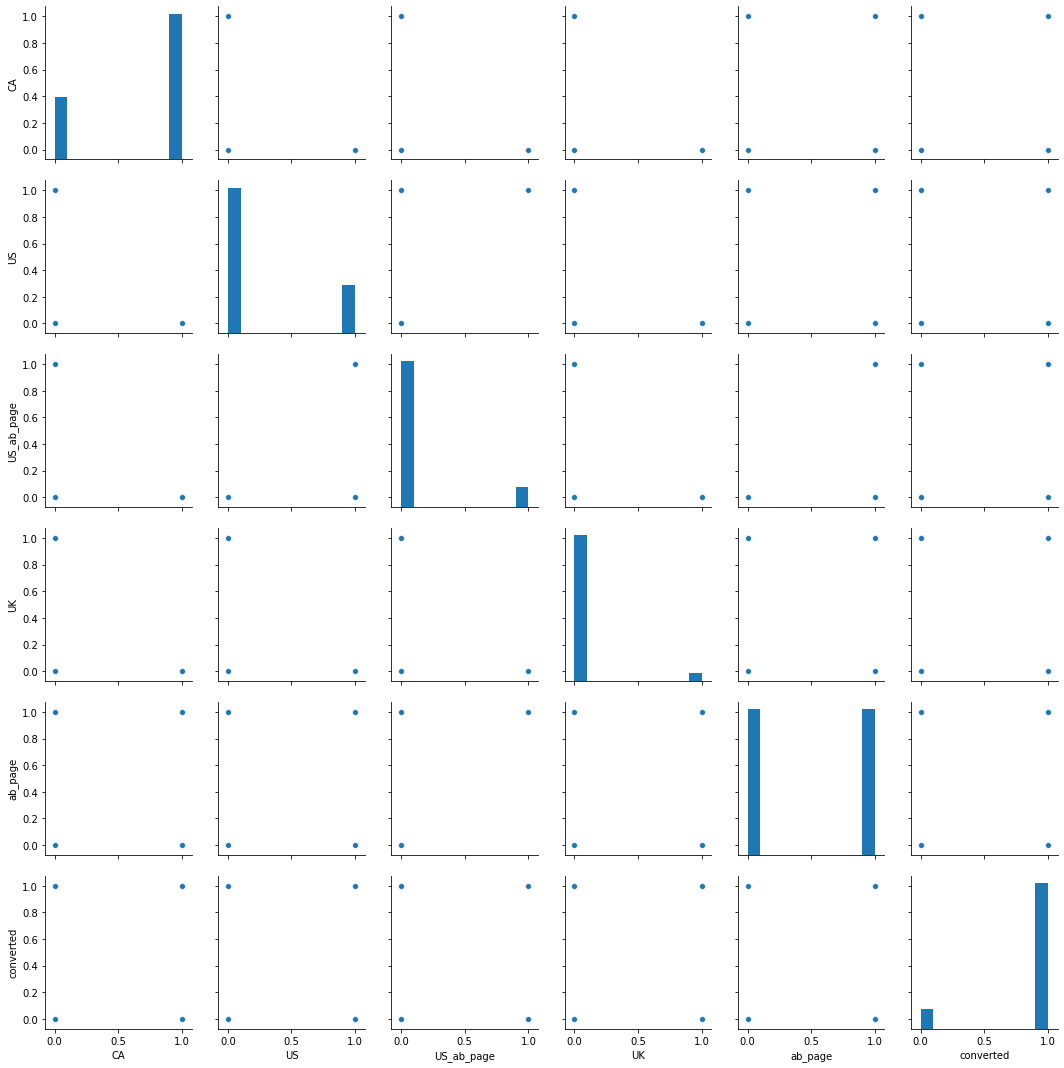

In [196]:
sb.pairplot(df_new[[ 'CA','US','US_ab_page','UK',   'ab_page','converted']]);

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.